<a href="https://colab.research.google.com/github/thecodt123/Welcome_To_Colab.ipynb/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flipkart Reviews Sentiment Analysis using Python

Flipkart is one of the most popular Indian companies. It is an e-commerce platform that competes with popular e-commerce platforms like Amazon. One of the most popular use cases of data science is the task of sentiment analysis of product reviews sold on e-commerce platforms.

In [30]:
pip install nbconvert

In [31]:
pip install matplotlib

In [32]:
pip install matplotlib

In [33]:
pip install nltk

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv(r"/content/flipkart_reviews_dataset.csv")
data.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,1-more flexible2-bass is very high3-sound clar...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,Very much satisfied with the device at this pr...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Super!,"Nice headphone, bass was very good and sound i...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version ...,5,Terrific purchase,Sound quality super battery backup super quali...,New Delhi,8 months ago,533,114


In [35]:
data.isnull().sum()

product_id          0
product_title       0
rating              0
summary             0
review              0
location         1293
date                0
upvotes             0
downvotes           0
dtype: int64

In [36]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
import nltk
import re
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["review"] = data["review"].apply(clean)

The Rating column of the data contains the ratings given by every reviewer. So let’s have a look at how most of the people rate the products they buy from Flipkart:

In [38]:
ratings = data["rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, values=quantity, names=numbers,hole = 0.5)
figure.show()


So 60% of the reviewers have given 5 out of 5 ratings to the products they buy from Flipkart. Now let’s have a look at the kind of reviews people leave. For this, I will use a word cloud to visualize the most used words in the reviews column

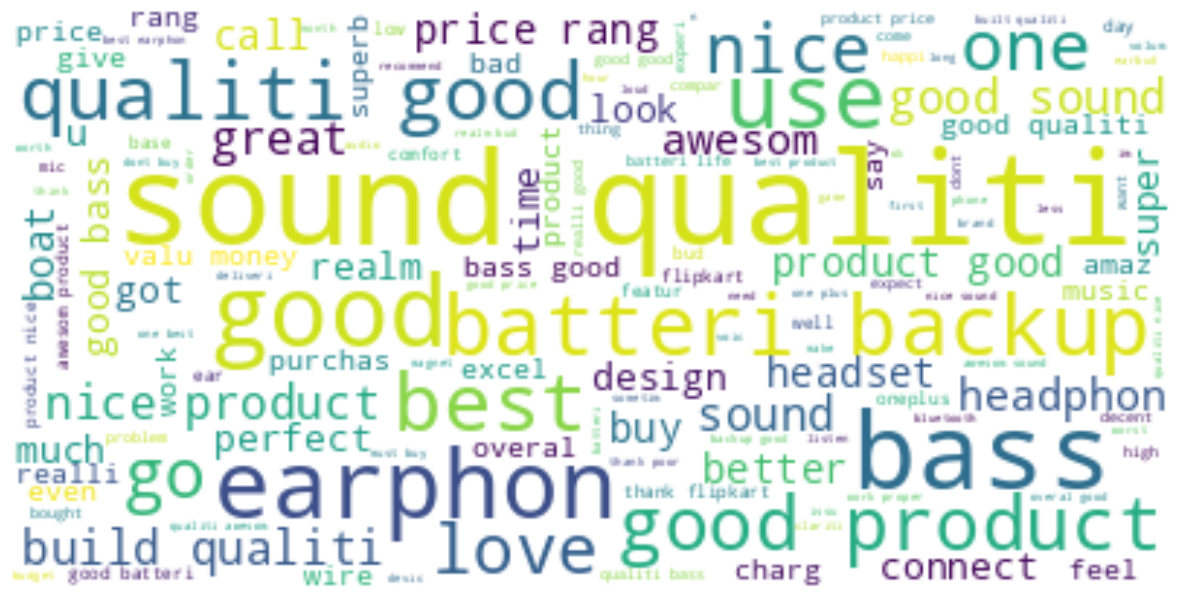

In [39]:
text = " ".join(i for i in data.review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [40]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [41]:
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["review"]]
data = data[["review", "Positive", "Negative", "Neutral"]]
data.head()

,review,Positive,Negative,Neutral
0,clariti good back hour thing fastest ch...,0.287,0.063,0.650
1,super sound good look like prize,0.863,0.000,0.137
2,much satisfi devic price point awesom brand de...,0.223,0.071,0.707
3,nice headphon bass good sound clear purchas ca...,0.394,0.057,0.548
4,sound qualiti super batteri backup super quali...,0.634,0.000,0.366


Now let’s see how most of the reviewers think about the products and services of Flipkart:

In [42]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [43]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)


Positive:  3779.763000000078
Negative:  518.0249999999994
Neutral:  5074.220999999948
